In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
bankch = pd.read_csv('BankChurners.csv')

In [65]:
# 이탈 여부 변환
bankch["Attrition_Flag"] = bankch["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})


# 분석할 열 선택
economic_factors = ["Income_Category", "Credit_Limit", "Total_Revolving_Bal", "Avg_Utilization_Ratio"]
df_econ = bankch[economic_factors].copy()


# Income_Category 변환
income_mapping = {
    "Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5
}
df_econ["Income_Category"] = df_econ["Income_Category"].map(income_mapping)


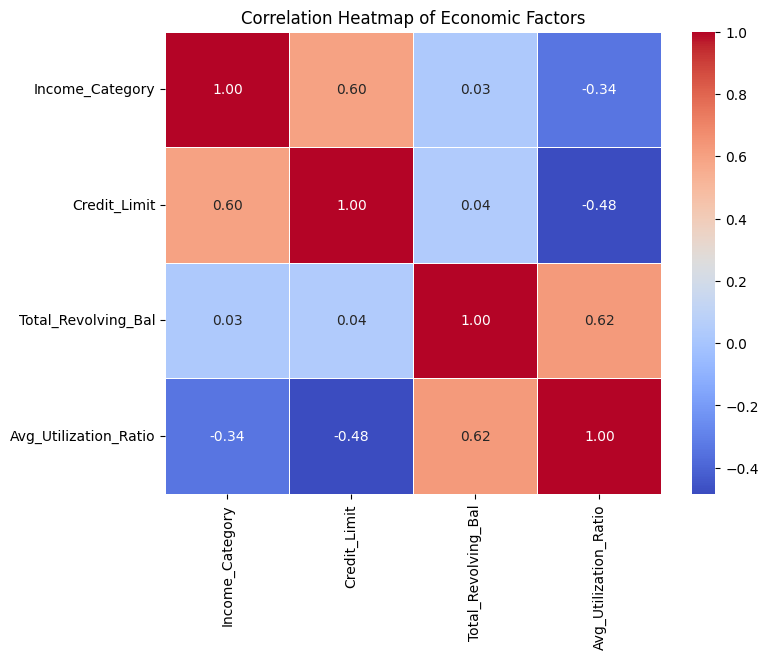

In [66]:
# 상관계수 계산
corr_matrix = df_econ.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Economic Factors")
plt.show()

C:\Users\car13\AppData\Local\Temp\ipykernel_204160\981756927.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_econ["Income_Category"], palette="Blues")


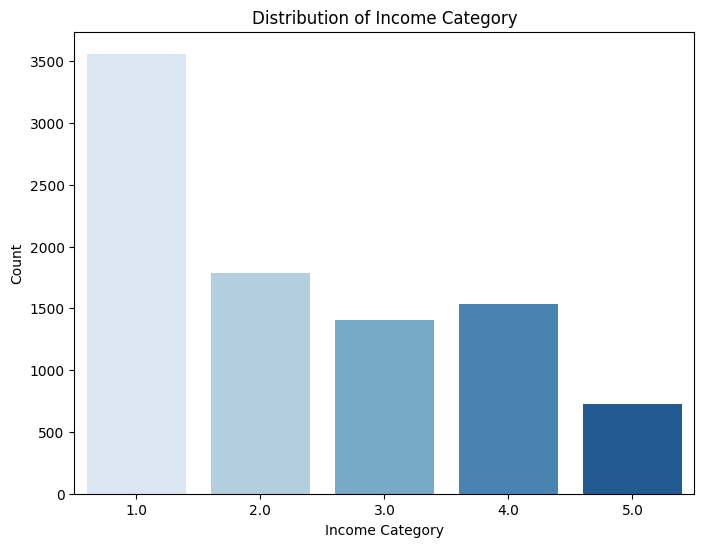

In [67]:
# 소득 범주 분포
# "Less than $40K": 1 | "$40K - $60K": 2 | "$60K - $80K": 3 | "$80K - $120K": 4 | "$120K +": 5
plt.figure(figsize=(8, 6))
sns.countplot(x=df_econ["Income_Category"], palette="Blues")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Distribution of Income Category")
plt.show()

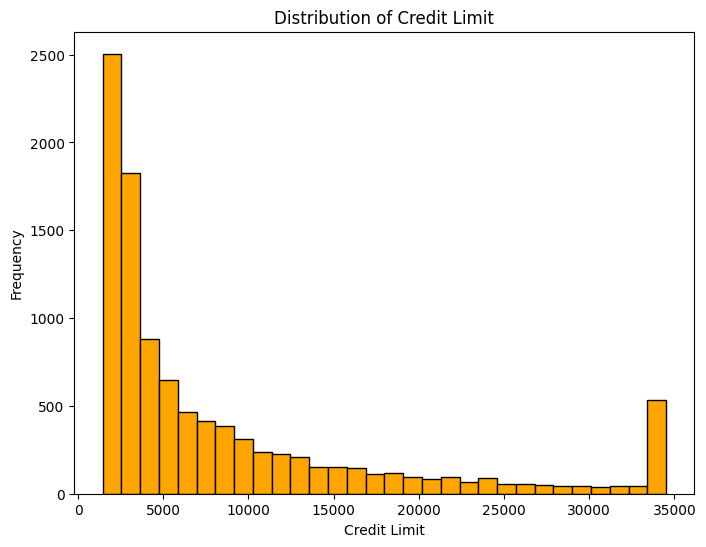

In [68]:
# 신용 한도
plt.figure(figsize=(8, 6))
df_econ["Credit_Limit"].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Limit")
plt.show()

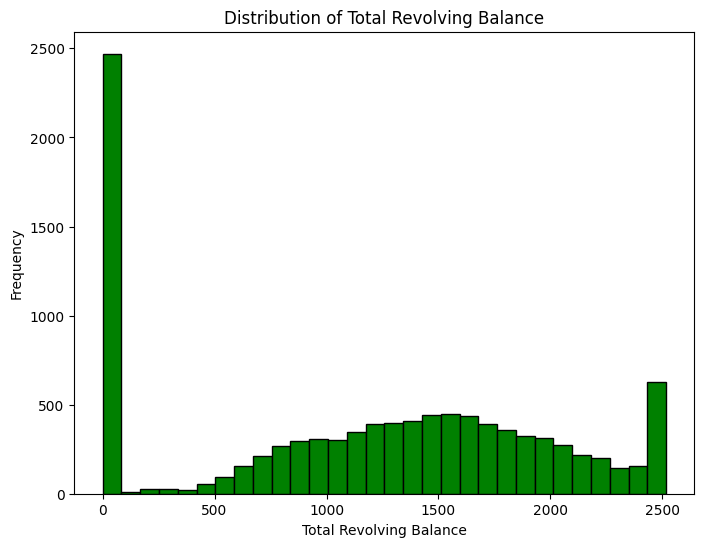

In [69]:
# 리볼빙 잔액
plt.figure(figsize=(8, 6))
df_econ["Total_Revolving_Bal"].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.xlabel("Total Revolving Balance")
plt.ylabel("Frequency")
plt.title("Distribution of Total Revolving Balance")
plt.show()

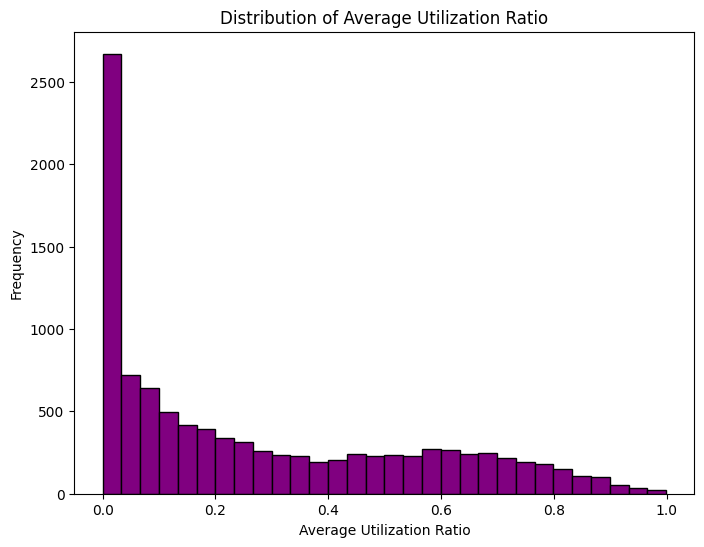

In [70]:
# Avg_Utilization_Ratio
plt.figure(figsize=(8, 6))
df_econ["Avg_Utilization_Ratio"].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.xlabel("Average Utilization Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Average Utilization Ratio")
plt.show()

In [71]:
# # 소득과 신용 한도 간의 관계 시각화
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=bankch["Income_Category"], y=bankch["Credit_Limit"], order=income_mapping.keys())
# plt.xticks(rotation=45)
# plt.title("Credit Limit by Income Category")
# plt.show()

C:\Users\car13\AppData\Local\Temp\ipykernel_204160\34829333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_econ["Income_Category"], y=df_econ["Credit_Limit"], palette="Blues")


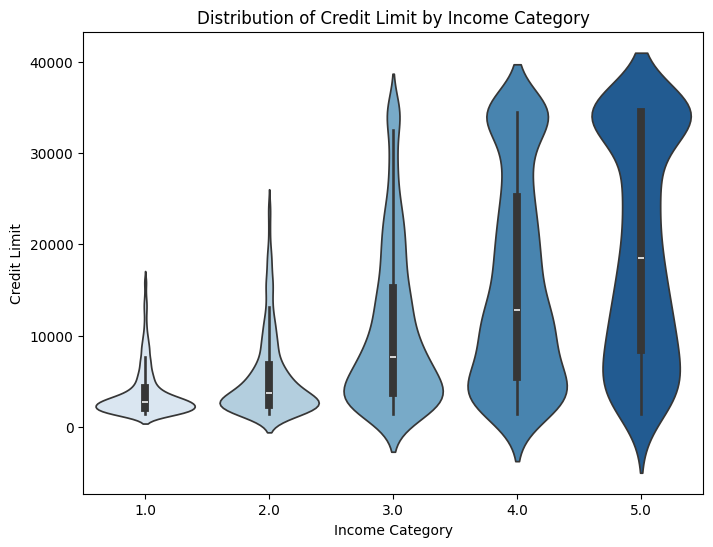

In [72]:
# 소득과 신용 한도 간의 관계
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_econ["Income_Category"], y=df_econ["Credit_Limit"], palette="Blues")
plt.xlabel("Income Category")
plt.ylabel("Credit Limit")
plt.title("Distribution of Credit Limit by Income Category")
plt.show()

In [73]:
# # 소득과 신용 한도 간의 관계
# income_credit = bankch.groupby("Income_Category")["Credit_Limit"].mean().sort_index()
# plt.figure(figsize=(8, 6))
# sns.barplot(x=income_credit.index, y=income_credit.values, palette="Blues")
# plt.xlabel("Income Category")
# plt.ylabel("Average Credit Limit")
# plt.title("Average Credit Limit by Income Category")
# plt.show()


C:\Users\car13\AppData\Local\Temp\ipykernel_204160\1816378933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_econ["Income_Category"], y=df_econ["Credit_Limit"], palette="coolwarm")


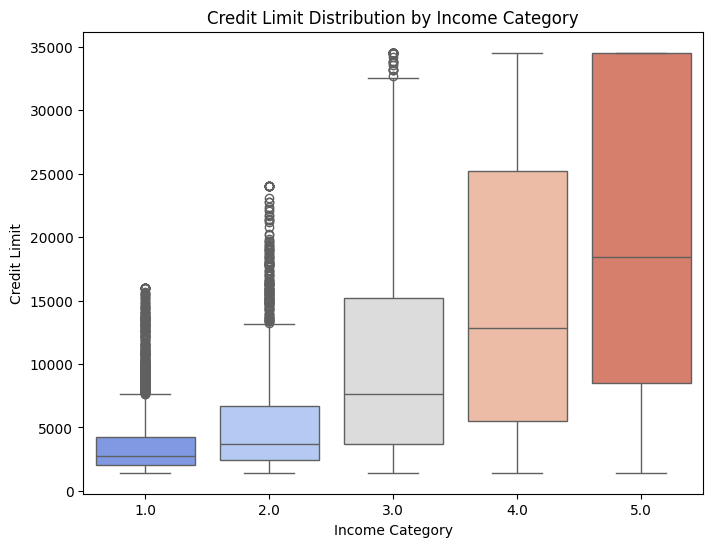

In [74]:
# 소득별 신용 한도 분포
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_econ["Income_Category"], y=df_econ["Credit_Limit"], palette="coolwarm")
plt.xlabel("Income Category")
plt.ylabel("Credit Limit")
plt.title("Credit Limit Distribution by Income Category")
plt.show()

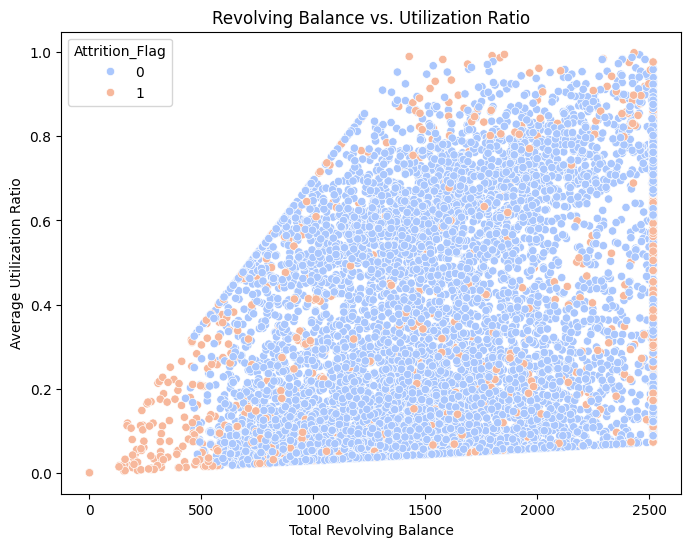

In [75]:
# 총 리볼빙 잔액과 평균 이용률 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_econ["Total_Revolving_Bal"], y=df_econ["Avg_Utilization_Ratio"], hue=bankch["Attrition_Flag"], palette="coolwarm")
plt.xlabel("Total Revolving Balance")
plt.ylabel("Average Utilization Ratio")
plt.title("Revolving Balance vs. Utilization Ratio")
plt.show()

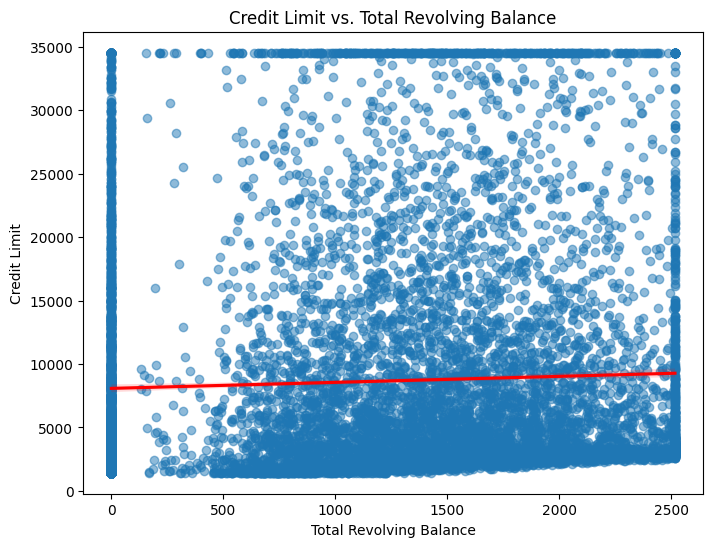

In [79]:
# 리볼빙 잔액과과 신용한도의 관계
plt.figure(figsize=(8, 6))
sns.regplot(x=df_econ["Total_Revolving_Bal"], y=df_econ["Credit_Limit"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Total Revolving Balance")
plt.ylabel("Credit Limit")
plt.title("Credit Limit vs. Total Revolving Balance")
plt.show()

C:\Users\car13\AppData\Local\Temp\ipykernel_204160\306616941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_econ["Income_Category"], y=bankch["Attrition_Flag"], palette="Greens")


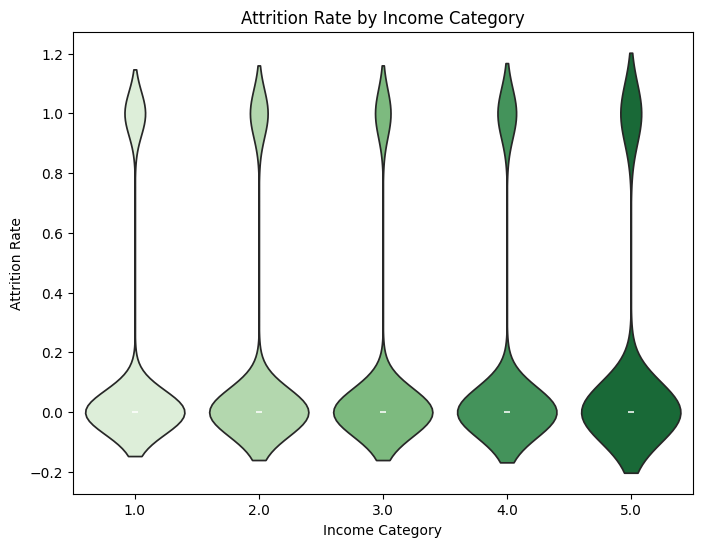

In [ ]:
# 경제적 요인과 고객 이탈 간의 관계 분석
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_econ["Income_Category"], y=bankch["Attrition_Flag"], palette="Greens")
plt.xlabel("Income Category")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Income Category")
plt.show()

C:\Users\car13\AppData\Local\Temp\ipykernel_204160\1899479942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=bankch["Attrition_Flag"], y=df_econ["Avg_Utilization_Ratio"], palette="pastel")


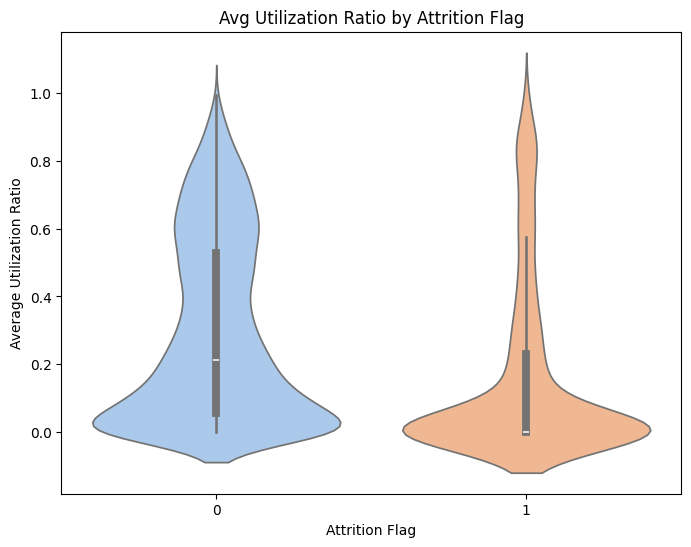

In [ ]:
# 3. Attrition_Flag별 Avg_Utilization_Ratio 분포
plt.figure(figsize=(8, 6))
sns.violinplot(x=bankch["Attrition_Flag"], y=df_econ["Avg_Utilization_Ratio"], palette="pastel")
plt.xlabel("Attrition Flag")
plt.ylabel("Average Utilization Ratio")
plt.title("Avg Utilization Ratio by Attrition Flag")
plt.show()

In [80]:
# # 신용 한도와 고객 이탈률 관계 (Scatter Plot)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=df_econ["Credit_Limit"], y=bankch["Attrition_Flag"], alpha=0.5, color="orange")
# plt.xlabel("신용한도")
# plt.ylabel("Attrition Rate")
# plt.title("신용 한도에 따른 이탈률")
# plt.show()

In [81]:
# #신용 한도 구간에서 고객 이탈 비율 계산
# attrition_credit = bankch.groupby("Credit_Limit")["Attrition_Flag"].mean().sort_index()
# plt.figure(figsize=(8, 6))
# sns.barplot(x=attrition_credit.index, y=attrition_credit.values, palette="Oranges")
# plt.xlabel("Credit Limit")
# plt.ylabel("Attrition Rate")
# plt.title("Attrition Rate by Credit Limit")
# plt.show()


In [83]:
# # 경제적 요인과 고객 이탈 간의 관계 분석
# attrition_income = bankch.groupby("Income_Category")["Attrition_Flag"].mean().sort_index()
# plt.figure(figsize=(8, 6))
# sns.barplot(x=attrition_income.index, y=attrition_income.values, palette="Greens")
# plt.xlabel("소득 항목")
# plt.ylabel("이탈률")
# plt.title("소득 범주별 이탈률")
# plt.show()

C:\Users\car13\AppData\Local\Temp\ipykernel_204160\3394642986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_attrition.index, y=income_attrition.values, palette="muted")


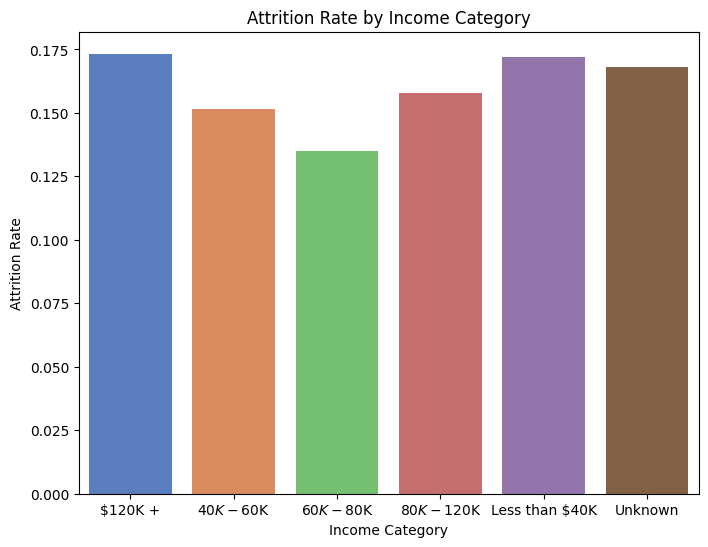

In [ ]:
# Income_Category별 Attrition Rate
income_attrition = bankch.groupby("Income_Category")["Attrition_Flag"].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=income_attrition.index, y=income_attrition.values, palette="muted")
plt.xlabel("Income Category")
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Income Category")
plt.show()